## Introduction

In this project, we will be exploring data of employees' exist surverys from the Department of Education, Training and Employment (DETE) and Technical and Further Education (TAFE) institute in Queensland, Australia.

Original data and complete documentation could be found [here](https://data.gov.au/dataset/ds-qld-fe96ff30-d157-4a81-851d-215f2a0fe26d/details?q=exit%20survey) and [here](https://data.gov.au/dataset/ds-qld-89970a3b-182b-41ea-aea2-6f9f17b5907e/details?q=exit%20survey).

We will try to answer the following questions:
- Are employees who only worked for the institues for a short period of time resigning due to some kind of dissatisfaction? What about employees who have been there longer? (employment length)
- Are younger employees resigning due to some kind of dissatisfaction? What about older employees? (age)

In [1]:
# read data set
import numpy as np
import pandas as pd

with open('dete_survey.csv', 'r') as file:
    dete_survey = pd.read_csv(file)
    
with open('tafe_survey.csv', 'r') as file:
    tafe_survey = pd.read_csv(file)

In [2]:
# exploring DETE data set

dete_survey.info()
dete_survey.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 822 entries, 0 to 821
Data columns (total 56 columns):
ID                                     822 non-null int64
SeparationType                         822 non-null object
Cease Date                             822 non-null object
DETE Start Date                        822 non-null object
Role Start Date                        822 non-null object
Position                               817 non-null object
Classification                         455 non-null object
Region                                 822 non-null object
Business Unit                          126 non-null object
Employment Status                      817 non-null object
Career move to public sector           822 non-null bool
Career move to private sector          822 non-null bool
Interpersonal conflicts                822 non-null bool
Job dissatisfaction                    822 non-null bool
Dissatisfaction with the department    822 non-null bool
Physical work environ

,ID,SeparationType,Cease Date,DETE Start Date,Role Start Date,Position,Classification,Region,Business Unit,Employment Status,...,Kept informed,Wellness programs,Health & Safety,Gender,Age,Aboriginal,Torres Strait,South Sea,Disability,NESB
0,1,Ill Health Retirement,08/2012,1984,2004,Public Servant,A01-A04,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,N,N,N,Male,56-60,NaN,NaN,NaN,NaN,Yes
1,2,Voluntary Early Retirement (VER),08/2012,Not Stated,Not Stated,Public Servant,AO5-AO7,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,N,N,N,Male,56-60,NaN,NaN,NaN,NaN,NaN
2,3,Voluntary Early Retirement (VER),05/2012,2011,2011,Schools Officer,NaN,Central Office,Education Queensland,Permanent Full-time,...,N,N,N,Male,61 or older,NaN,NaN,NaN,NaN,NaN
3,4,Resignation-Other reasons,05/2012,2005,2006,Teacher,Primary,Central Queensland,NaN,Permanent Full-time,...,A,N,A,Female,36-40,NaN,NaN,NaN,NaN,NaN
4,5,Age Retirement,05/2012,1970,1989,Head of Curriculum/Head of Special Education,NaN,South East,NaN,Permanent Full-time,...,N,A,M,Female,61 or older,NaN,NaN,NaN,NaN,NaN


In [3]:
dete_survey["Age"].value_counts()

61 or older      222
56-60            174
51-55            103
46-50             63
41-45             61
26-30             57
36-40             51
21-25             40
31-35             39
20 or younger      1
Name: Age, dtype: int64

We see that for the data set from DETE, there are 56 features and 822 entries. We can already identify some data cleaning processes from this preliminary exploration, such as:
- Dropping columns: certain columns such as "Classification", "Business Unit", "Aboriginal" and such have more than half of its data missing, hence are possible candidates to be dropped.
- Reformatting dtype: datetime columns are still saved as objects. Since one of focus of our analysis will be based on length of employment, reformatting the data will allow us to access specific methods that will improve ease of calculation.
- Restructuring "Age": another focus of our analysis will be based on the age of the employee, which is currently being grouped into 10 brackets, we could consider re-grouping the ages to match the needs of our analysis.

In [4]:
# exploring TAFE data set

tafe_survey.info()
tafe_survey.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 702 entries, 0 to 701
Data columns (total 72 columns):
Record ID                                                                                                                                                        702 non-null float64
Institute                                                                                                                                                        702 non-null object
WorkArea                                                                                                                                                         702 non-null object
CESSATION YEAR                                                                                                                                                   695 non-null float64
Reason for ceasing employment                                                                                                                                    701 non-

,Record ID,Institute,WorkArea,CESSATION YEAR,Reason for ceasing employment,Contributing Factors. Career Move - Public Sector,Contributing Factors. Career Move - Private Sector,Contributing Factors. Career Move - Self-employment,Contributing Factors. Ill Health,Contributing Factors. Maternity/Family,...,Workplace. Topic:Does your workplace promote a work culture free from all forms of unlawful discrimination?,Workplace. Topic:Does your workplace promote and practice the principles of employment equity?,Workplace. Topic:Does your workplace value the diversity of its employees?,Workplace. Topic:Would you recommend the Institute as an employer to others?,Gender. What is your Gender?,CurrentAge. Current Age,Employment Type. Employment Type,Classification. Classification,LengthofServiceOverall. Overall Length of Service at Institute (in years),LengthofServiceCurrent. Length of Service at current workplace (in years)
0,6.341330e+17,Southern Queensland Institute of TAFE,Non-Delivery (corporate),2010.0,Contract Expired,NaN,NaN,NaN,NaN,NaN,...,Yes,Yes,Yes,Yes,Female,26 30,Temporary Full-time,Administration (AO),1-2,1-2
1,6.341337e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Retirement,-,-,-,-,-,...,Yes,Yes,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN
2,6.341388e+17,Mount Isa Institute of TAFE,Delivery (teaching),2010.0,Retirement,-,-,-,-,-,...,Yes,Yes,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN
3,6.341399e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Resignation,-,-,-,-,-,...,Yes,Yes,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN
4,6.341466e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,Career Move - Private Sector,-,-,-,...,Yes,Yes,Yes,Yes,Male,41 45,Permanent Full-time,Teacher (including LVT),3-4,3-4


In [5]:
print(tafe_survey["CurrentAge. Current Age"].value_counts())
print(tafe_survey.iloc[:,-1].value_counts())
print(tafe_survey.iloc[:, -2].value_counts())

56 or older      162
51-55             82
41  45            80
46  50            59
31  35            52
36  40            51
26  30            50
21  25            44
20 or younger     16
Name: CurrentAge. Current Age, dtype: int64
Less than 1 year      177
1-2                   113
3-4                    86
11-20                  82
More than 20 years     54
7-10                   44
5-6                    40
Name: LengthofServiceCurrent. Length of Service at current workplace (in years), dtype: int64
Less than 1 year      147
1-2                   102
3-4                    96
11-20                  89
More than 20 years     71
5-6                    48
7-10                   43
Name: LengthofServiceOverall. Overall Length of Service at Institute (in years), dtype: int64


For TAFE data det, we have 702 entires with 72 columns.
- Dropped columns: for columns that have too many missing data, we should consider dropping them if not relevant to central questions.
- Reformatting dtype: length of employment is given as categorical data, we should use this scale to reformat data of the DETE data set. We observed that there are only 9 age categories for the TAFE data set, and the keys follows a slightly different format, hence we would need to reformat this column so it is uniformed across data set.
- Renaming columns: some columns across both data sets answer the same question, however, the columns are named differently. We should rename for comparative analysis.


## Identify Missing Values and Drop Unecessary Columns

In [6]:
# cleaning and reshaping data
with open('dete_survey.csv', 'r') as file:
    dete_survey = pd.read_csv(file, na_values='Not Stated') # specifying NA value
    
# drop columns
dete_survey_updated = dete_survey.drop(dete_survey.columns[28:49], axis=1)
tafe_survey_updated = tafe_survey.drop(tafe_survey.columns[17:66], axis=1)

dete_survey_updated.info()
tafe_survey_updated.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 822 entries, 0 to 821
Data columns (total 35 columns):
ID                                     822 non-null int64
SeparationType                         822 non-null object
Cease Date                             788 non-null object
DETE Start Date                        749 non-null float64
Role Start Date                        724 non-null float64
Position                               817 non-null object
Classification                         455 non-null object
Region                                 717 non-null object
Business Unit                          126 non-null object
Employment Status                      817 non-null object
Career move to public sector           822 non-null bool
Career move to private sector          822 non-null bool
Interpersonal conflicts                822 non-null bool
Job dissatisfaction                    822 non-null bool
Dissatisfaction with the department    822 non-null bool
Physical work envir

Addressing some of the concerns raised during the preliminary data exploration, we specified the NA values of the DETE data set as "Not Stated", and dropped unnecessary columns from both data sets.

Now DETE survey have 35 columns, whilst TAFE survey have 23.

## Clean Column Names

In [7]:
# replace spaces with underscores, change capitalization to lowercase, removing trailing whitespaces
dete_survey_updated.columns = dete_survey_updated.columns.str.replace(' ', '_').str.lower().str.strip()

# renaming TAFE columns to match DETE
tafe_survey_updated.rename(columns={"Record ID": "id",
                                   "CESSATION YEAR": "cease_date",
                                   "Reason for ceasing employment": "separationtype",
                                   "Gender. What is your Gender?": "gender",
                                   "CurrentAge. Current Age": "age",
                                   "Employment Type. Employment Type": "employment_status",
                                   "Classification. Classification": "position",
                                   "LengthofServiceOverall. Overall Length of Service at Institute (in years)": "institute_service",
                                   "LengthofServiceCurrent. Length of Service at current workplace (in years)": "role_service"},
                          inplace=True)

In [8]:
# printing first 5 rows of datasets to check changes
print(dete_survey_updated.head())
print('\n')
print(tafe_survey_updated.head())

   id                    separationtype cease_date  dete_start_date  \
0   1             Ill Health Retirement    08/2012           1984.0   
1   2  Voluntary Early Retirement (VER)    08/2012              NaN   
2   3  Voluntary Early Retirement (VER)    05/2012           2011.0   
3   4         Resignation-Other reasons    05/2012           2005.0   
4   5                    Age Retirement    05/2012           1970.0   

   role_start_date                                      position  \
0           2004.0                                Public Servant   
1              NaN                                Public Servant   
2           2011.0                               Schools Officer   
3           2006.0                                       Teacher   
4           1989.0  Head of Curriculum/Head of Special Education   

  classification              region                      business_unit  \
0        A01-A04      Central Office  Corporate Strategy and Peformance   
1        AO5-A

Since we will try to join the two data sets for further analysis, we have to ensure that the column names are the same for both. Hence, we performed transformation on the column names to unify.

## Filter the Data

In [9]:
# filtering out data with 'separationtype' as resign
dete_survey_updated['separationtype'].value_counts()

Age Retirement                          285
Resignation-Other reasons               150
Resignation-Other employer               91
Resignation-Move overseas/interstate     70
Voluntary Early Retirement (VER)         67
Ill Health Retirement                    61
Other                                    49
Contract Expired                         34
Termination                              15
Name: separationtype, dtype: int64

In [10]:
tafe_survey_updated['separationtype'].value_counts()

Resignation                 340
Contract Expired            127
Retrenchment/ Redundancy    104
Retirement                   82
Transfer                     25
Termination                  23
Name: separationtype, dtype: int64

In [11]:
# selecting only data for survey respondents who have Resignation as separation type
dete_resignations = dete_survey_updated[dete_survey_updated['separationtype'].str.contains(r'Resignation')].copy()
tafe_resignations = tafe_survey_updated[tafe_survey_updated['separationtype'] == 'Resignation'].copy()

We are interested in analysing the reasoning behind employees who resigned in this project, hence, we first understand the different response to column 'separationtype' and have filtered out only data with a separation type of resignation.

## Verify the Data

In [12]:
# checking data for obvious logical inconsistencies and removing
dete_resignations['cease_date'].value_counts()
# reformatting data from mm/yyyy to yyyy
dete_resignations['cease_date'] = dete_resignations['cease_date'].str.split('/').str.get(-1).astype('float')
dete_resignations['cease_date'].value_counts(dropna=False)

 2013.0    146
 2012.0    129
 2014.0     22
NaN         11
 2010.0      2
 2006.0      1
Name: cease_date, dtype: int64

In [13]:
# checking that none of the start date is later than the latest cease date at 2014
dete_resignations['dete_start_date'].value_counts().sort_index(ascending=False)

2013.0    10
2012.0    21
2011.0    24
2010.0    17
2009.0    13
2008.0    22
2007.0    21
2006.0    13
2005.0    15
2004.0    14
2003.0     6
2002.0     6
2001.0     3
2000.0     9
1999.0     8
1998.0     6
1997.0     5
1996.0     6
1995.0     4
1994.0     6
1993.0     5
1992.0     6
1991.0     4
1990.0     5
1989.0     4
1988.0     4
1987.0     1
1986.0     3
1985.0     3
1984.0     1
1983.0     2
1982.0     1
1980.0     5
1977.0     1
1976.0     2
1975.0     1
1974.0     2
1973.0     1
1972.0     1
1971.0     1
1963.0     1
Name: dete_start_date, dtype: int64

In [14]:
tafe_resignations['cease_date'].value_counts().sort_index(ascending=False)

2013.0     55
2012.0     94
2011.0    116
2010.0     68
2009.0      2
Name: cease_date, dtype: int64

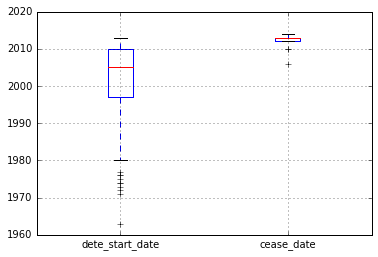

In [15]:
# magic command to show plots in Notebook
%matplotlib inline
import matplotlib.pyplot as plt

dete_resignations.boxplot(column=['dete_start_date', 'cease_date'])

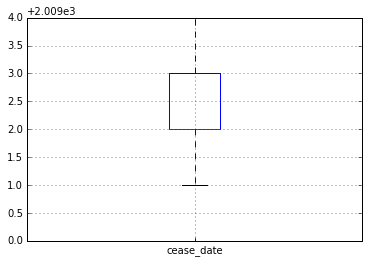

In [16]:
tafe_resignations.boxplot(column='cease_date')

We have used boxplots to observe the spread of 'cease_date' for both data sets, as well as the 'start_date' for DETE. From our exploration of both data sets, we do not see any major issues with the data values. Hence, we have opt to keep all of the data for analysis.

## Create a New Column

In [17]:
# create 'institute_service' for dete data set
dete_resignations['institute_service'] = dete_resignations['cease_date'] - dete_resignations['dete_start_date']

As one of the question of our projects require us to find possible relationship between length of employment at the two institution against reasoning for resignation. Hence, we will need a column that provides this data. We find that TAFE data set already have this information stored under the column 'institute_service', and so we need to create a corresponding column for DETE data.

We find that we can calculate the length of service by subtracting an employee's start date from their end date to find the length of their employment, thus we create this new column in the DETE data set.

## Identify Dissatisfied Employees

In [18]:
# understanding response values in TAFE and convert to boolean values when necessary
print(tafe_resignations['Contributing Factors. Dissatisfaction'].value_counts(dropna=False)) #set dropna to False to see NaN values
print(tafe_resignations['Contributing Factors. Job Dissatisfaction'].value_counts(dropna=False))

-                                         277
Contributing Factors. Dissatisfaction      55
NaN                                         8
Name: Contributing Factors. Dissatisfaction, dtype: int64
-                      270
Job Dissatisfaction     62
NaN                      8
Name: Contributing Factors. Job Dissatisfaction, dtype: int64


In [19]:
# defining function to convert columns to boolean values
def update_vals(val):
    if pd.isnull(val) == True:
        return np.nan
    elif val == '-':
        return False
    else:
        return True
    
# applying function to convert
tafe_bool = tafe_resignations[['Contributing Factors. Dissatisfaction', 'Contributing Factors. Job Dissatisfaction']].applymap(update_vals)
tafe_bool

,Contributing Factors. Dissatisfaction,Contributing Factors. Job Dissatisfaction
3,False,False
4,False,False
5,False,False
6,False,False
7,False,False
8,False,False
9,False,False
10,False,False
13,False,False
14,True,True


In [20]:
# creating 'dissatisfied' column for TAFE data set
tafe_resignations['dissatisfied'] = tafe_bool.any(axis=1, skipna=False)

In [21]:
# creating 'dissatisfied' column for DETE data set
dete_resignations['dissatisfied'] = dete_resignations[['job_dissatisfaction',
                               'dissatisfaction_with_the_department',
                               'physical_work_environment',
                               'lack_of_recognition',
                               'lack_of_job_security',
                               'work_location',
                               'employment_conditions',
                               'work_life_balance',
                               'workload']].any(axis=1, skipna=False)

In [22]:
# assigning results to new data sets
dete_resignations_up = dete_resignations.copy()
tafe_resignations_up = tafe_resignations.copy()

We have created a new column that returns a boolean value after taking into account of all survey questions that addresses whether if an employee is dissatisfied upon resignation. If any of the dissatisfaction question has been answered true, then we mark the new column as true; it is only if the employee had answered false to all of the related questions, then will we mark the column false.

To achieve this, we had to update columns in TAFE data set that were not entered as boolean values previously, and we have chosen to keep NaN values as is.

## Combine the Data

In [23]:
# prior to combining data sets, add institution identification column
dete_resignations_up['institution'] = "DETE"
tafe_resignations_up['institution'] = "TAFE"

In [24]:
# combine data sets
combined = pd.concat([dete_resignations_up, tafe_resignations_up], axis=0)
# verifying number of non null values in each column
combined.notnull().sum().sort_values()

torres_strait                                            0
south_sea                                                3
aboriginal                                               7
disability                                               8
nesb                                                     9
business_unit                                           32
classification                                         161
region                                                 265
role_start_date                                        271
dete_start_date                                        283
role_service                                           290
career_move_to_public_sector                           311
employment_conditions                                  311
work_location                                          311
lack_of_job_security                                   311
job_dissatisfaction                                    311
dissatisfaction_with_the_department                    3

In [25]:
# dropping columns not necessary for further analysis
combined_updated = combined.dropna(axis=1, thresh=500)
combined_updated.columns

Index(['age', 'cease_date', 'dissatisfied', 'employment_status', 'gender',
       'id', 'institute_service', 'institution', 'position', 'separationtype'],
      dtype='object')

We have merged the two data sets vertically and decided to set 500 non-null values as our threshold and dropped all columns with less than the threshold.

## Clean the Service Column

In [26]:
# understanding column values and converting into string dtype
combined_updated['institute_service'].astype('str').value_counts(dropna=False)

nan                   88
Less than 1 year      73
1-2                   64
3-4                   63
5-6                   33
11-20                 26
5.0                   23
1.0                   22
7-10                  21
3.0                   20
0.0                   20
6.0                   17
4.0                   16
9.0                   14
2.0                   14
7.0                   13
More than 20 years    10
8.0                    8
13.0                   8
20.0                   7
15.0                   7
17.0                   6
12.0                   6
10.0                   6
22.0                   6
14.0                   6
18.0                   5
16.0                   5
23.0                   4
24.0                   4
11.0                   4
39.0                   3
32.0                   3
19.0                   3
21.0                   3
30.0                   2
25.0                   2
26.0                   2
28.0                   2
36.0                   2


In [27]:
# extracting the digits and converting values into float dtype
combined_updated['institute_service_up'] = combined_updated['institute_service'].astype('str').str.extract(r'(\d+)')
combined_updated['institute_service_up'] = combined_updated['institute_service_up'].astype('float')

/dataquest/system/env/python3/lib/python3.4/site-packages/ipykernel/__main__.py:2: FutureWarning: currently extract(expand=None) means expand=False (return Index/Series/DataFrame) but in a future version of pandas this will be changed to expand=True (return DataFrame)
  from ipykernel import kernelapp as app
/dataquest/system/env/python3/lib/python3.4/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
/dataquest/system/env/python3/lib/python3.4/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/

In [28]:
# since we observed a SettingWithCopyWarning, we will run the column to verify before moving on
combined_updated['institute_service_up'].value_counts()

1.0     159
3.0      83
5.0      56
7.0      34
11.0     30
0.0      20
20.0     17
6.0      17
4.0      16
9.0      14
2.0      14
13.0      8
8.0       8
15.0      7
17.0      6
10.0      6
12.0      6
14.0      6
22.0      6
16.0      5
18.0      5
24.0      4
23.0      4
39.0      3
19.0      3
21.0      3
32.0      3
28.0      2
36.0      2
25.0      2
30.0      2
26.0      2
29.0      1
38.0      1
42.0      1
27.0      1
41.0      1
35.0      1
49.0      1
34.0      1
33.0      1
31.0      1
Name: institute_service_up, dtype: int64

In [29]:
# categorising 'institute_service' column to fewer bins
def service_mod(val):
    if val < 3:
        return 'New'
    elif val >= 3 and val <= 6:
        return 'Experienced'
    elif val >=7 and val <= 10:
        return 'Established'
    elif pd.isnull(val):
        return np.nan
    else:
        return 'Veteran'

In [30]:
# applying function to column
combined_updated['service_cat'] = combined_updated['institute_service_up'].apply(service_mod)

/dataquest/system/env/python3/lib/python3.4/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [31]:
# since we received another SettingWithCopyWarning, let's verify the modifications before moving on
combined_updated['service_cat'].value_counts(dropna=False)

New            193
Experienced    172
Veteran        136
NaN             88
Established     62
Name: service_cat, dtype: int64

For easier data analysis, we have chosen to recategorise the data in the institute_service column. We first extracted the numeric data provided, then categorised the data in to four groups with definitions as follows:

- 'New': Less than 3 years
- 'Experienced': 3-6 years
- 'Established': 7-10 years
- 'Veteran': 11 or more years

We came across the SettingWithCopyWarning quite often during this section of the project becasuse the combined data set was created with copies of the two original sets. We handled the warning by verifying data post transformation to ensure that we have achieved the result desired. Further readings for this warning could be found [here](https://www.dataquest.io/blog/settingwithcopywarning/).

## Performing Initial Analysis

In [32]:
# obseriving values in 'dissatisfied' column
combined_updated['dissatisfied'].value_counts(dropna=False)

False    403
True     240
NaN        8
Name: dissatisfied, dtype: int64

In [33]:
# fill null values with mode
combined_updated['dissatisfied'].fillna(value=False, inplace=True)

/dataquest/system/env/python3/lib/python3.4/site-packages/pandas/core/generic.py:4355: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


In [34]:
# calculating the percentage of dissatisfied employees in each 'service_cat' group
dis_pivot = combined_updated.pivot_table(values='dissatisfied', index='service_cat')

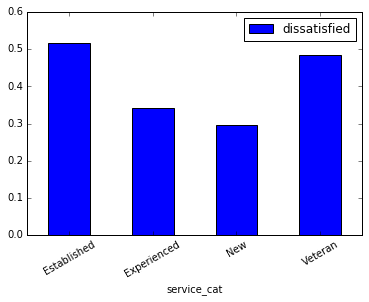

In [35]:
# plot bar chart of data above
dis_pivot.plot(kind='bar', rot=30)

From the initial analysis, we found that employees in the 'Established' and 'Veteran' categories (7+ years of employment) are more likely to resign due to dissatisfaction.

## Further steps
In this guided project, we experienced that in order to extract any meaningful insights from our data, we had to perform many data cleaning tasks. In order to create one visualization (and not even the final one), we completed the following tasks:

- Explored the data and figured out how to prepare it for analysis
- Corrected some of the missing values
- Dropped any data not needed for our analysis
- Renamed our columns
- Verified the quality of our data
- Created a new institute_service column
- Cleaned the Contributing Factors columns
- Created a new column indicating if an employee resigned because they were dissatisfied in some way
- Combined the data
- Cleaned the institute_service column
- Handled the missing values in the dissatisfied column
- Aggregated the data

Possible continuation of project:

- Decide how to handle the rest of the missing values. Then, aggregate the data according to the service_cat column again. How many people in each career stage resigned due to some kind of dissatisfaction?
- Clean the age column. How many people in each age group resgined due to some kind of dissatisfaction?
- Instead of analyzing the survey results together, analyze each survey separately. Did more employees in the DETE survey or TAFE survey end their employment because they were dissatisfied in some way?
- Format your project using Dataquest's project style guide.